# Import all modules

In [ ]:
import pandas as pd # to start reading csv
import numpy as np
import matplotlib.pyplot as plt #plotting basic
import seaborn as sns
%matplotlib inline

# Reading all the files

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

# 1: Analyzing file 'Aisles', 'Departments', and 'Products'

In [38]:
print('Total Aisles: {}'.format(aisles.shape[0]))
aisles.head() #showing what food is placed on which aisle

Total Aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [35]:
print('Total departments: {}'.format(departments.shape[0]))
departments.head() # shows what kind of food is in the department

Total departments: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [36]:
print('Total products: {}'.format(products.shape[0]))
products.head() #shows what aisle and department is the specific product

Total products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [60]:
# combine aisles, departments and products (left joined to products)
combined_specs = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# to retain '-' and make product names more "standard"
combined_specs.product_name = combined_specs.product_name.str.replace(' ', '_').str.lower() 

combined_specs.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


# Department vs. Aisle top selling items

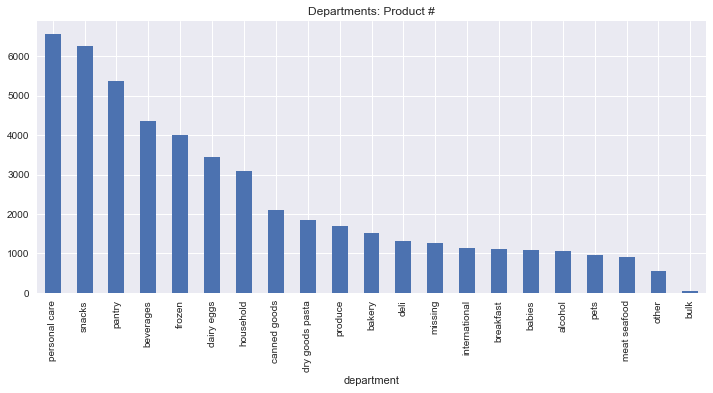

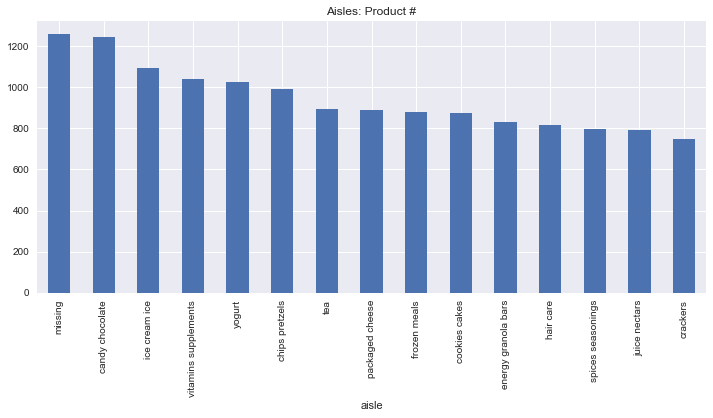

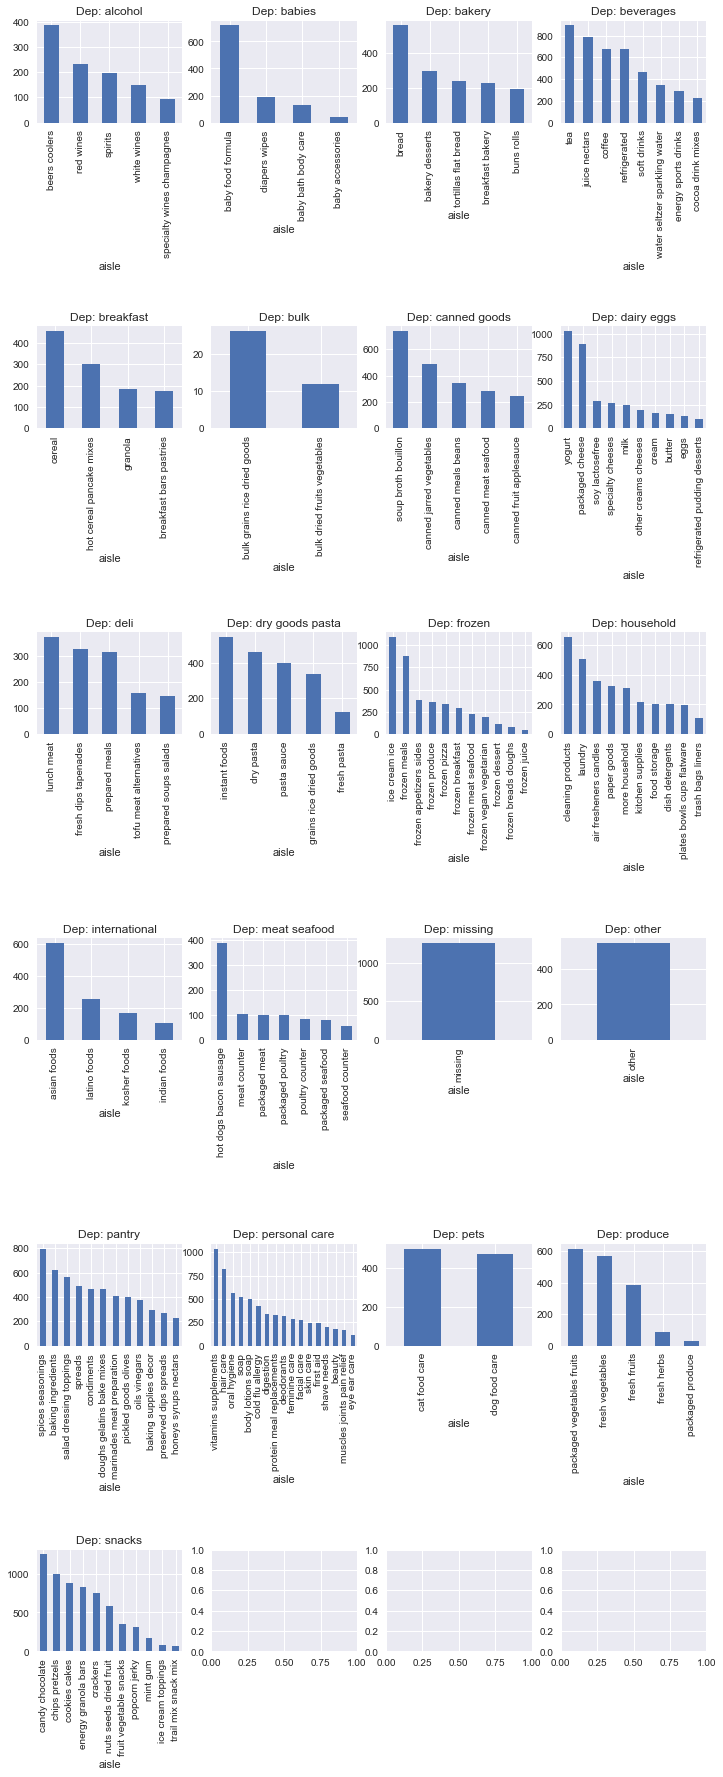

In [61]:
# basic group info (departments)
plt.figure(figsize=(12, 5))
combined_specs.groupby(['department']).count()['product_id'].copy()\
.sort_values(ascending=False).plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Departments: Product #')


# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
combined_specs.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    combined_specs[combined_specs.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

# 2: Orders

In [20]:
orders.head() 
print("orders_shape: {}".format(orders.shape))
print(orders.groupby('eval_set').size())
orders.head()
#shows for each order made by a user, there is a specification of time of order and order dates before previous

orders_shape: (3421083, 7)
eval_set
prior    3214874
test       75000
train     131209
dtype: int64


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


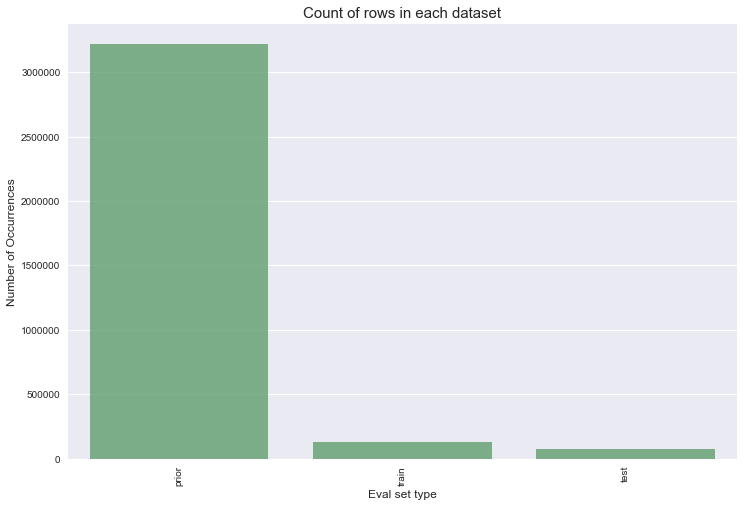

In [32]:
color = sns.color_palette()
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [22]:
orders[orders.user_id <= 10].groupby(['user_id','eval_set']).size().unstack(fill_value=0)

eval_set,prior,test,train
user_id,,,
1,10,0,1
2,14,0,1
3,12,1,0
4,5,1,0
5,4,0,1
6,3,1,0
7,20,0,1
8,3,0,1
9,3,0,1


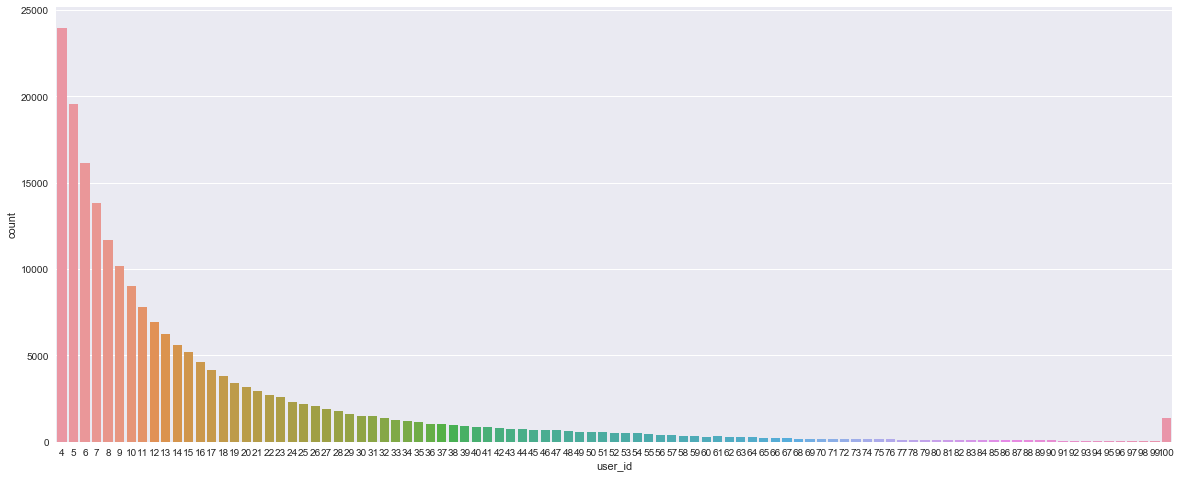

In [23]:
plt.figure(figsize=(20,8))
ax = sns.countplot(orders['user_id'].value_counts())

# 2a: Orders count by day of the week and hour hour of the day

[<matplotlib.text.Text at 0x1148c8410>, <matplotlib.text.Text at 0x10d325d90>]

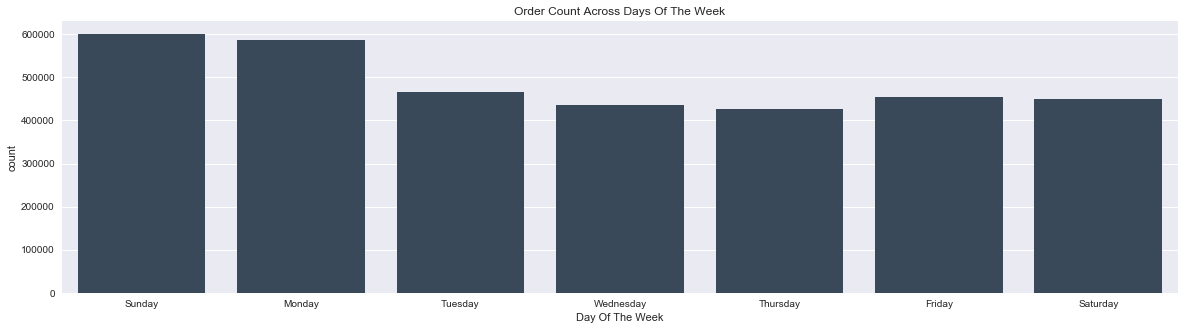

In [41]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sns.countplot(color="#34495e",data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

[<matplotlib.text.Text at 0x10d2c0ad0>, <matplotlib.text.Text at 0x10c80c4d0>]

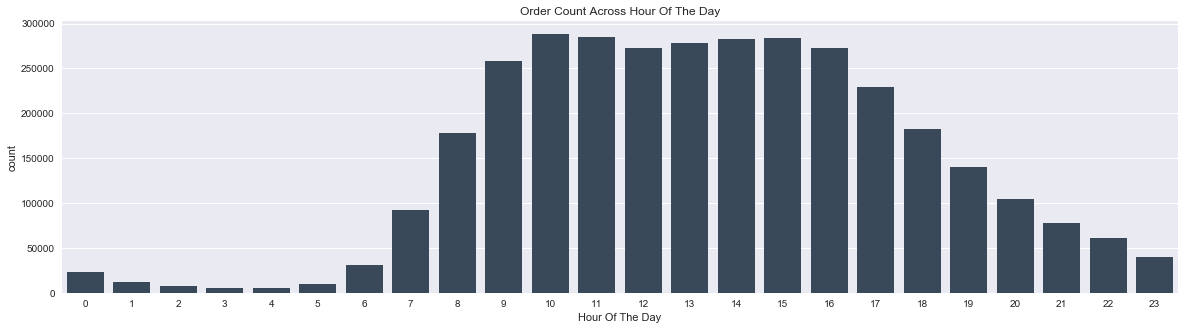

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=orders,x="order_hour_of_day",ax=ax,color="#34495e")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

# 2b: Orders Reorder Count by hour of the day

[<matplotlib.text.Text at 0x10ceb7a10>, <matplotlib.text.Text at 0x114c86910>]

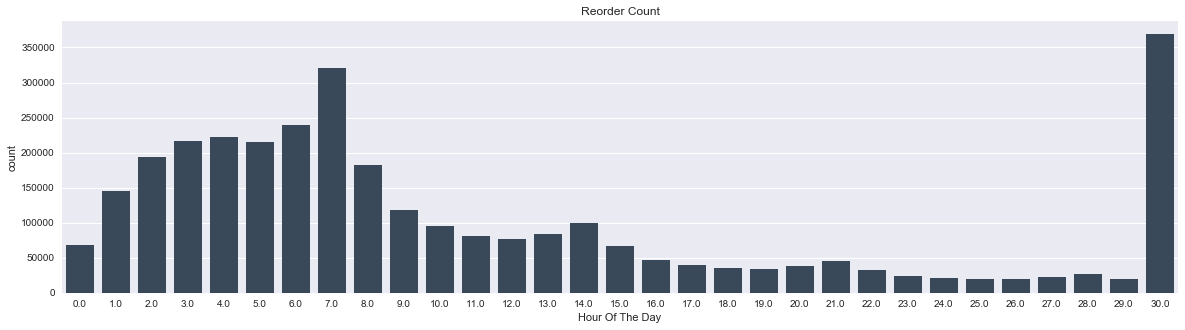

In [44]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(color="#34495e",data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")

# 2c: Min and Max order made by count

[<matplotlib.text.Text at 0x10c678a90>, <matplotlib.text.Text at 0x10c68a850>]

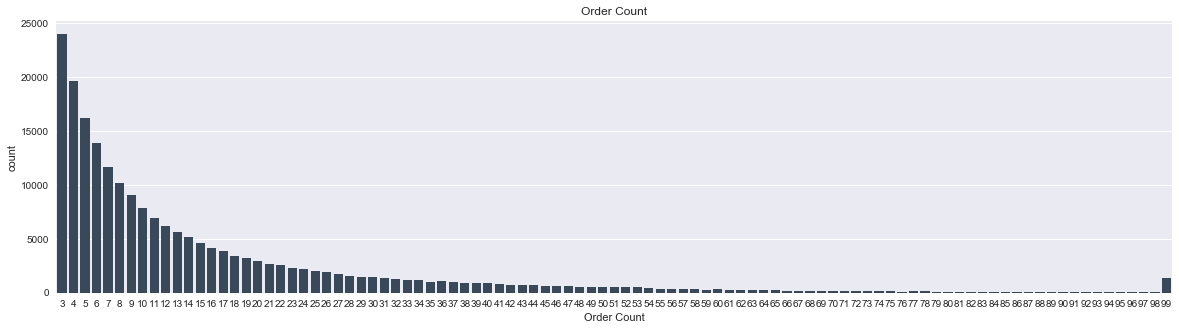

In [45]:
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(color="#34495e",data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")

no order mad is less than 3 and most is capped at 100

Need to add in situation where:
- add to cart vs. reorder ratio
- reorder rate accross the week/hour and combined

# 3: Analysing Order Product Prior and Order Product Train

In [26]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
print("order_products_prior shape: {}".format(order_products_prior.shape))

order_products_prior shape: (32434489, 4)


In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [27]:
print("order_products_train shape: {}".format(order_products_train.shape))

order_products_train shape: (1048575, 4)


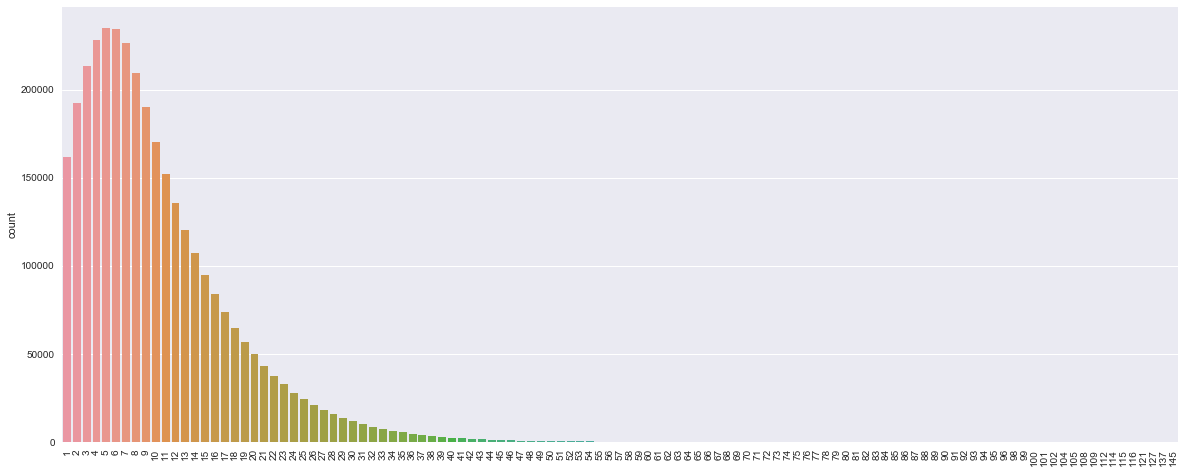

In [29]:
order_products_prior['eval_set'] = 'prior'
order_products_train['eval_set'] = 'train'
order_products = order_products_prior.append(order_products_train, ignore_index=True)

cnt_products_per_order = order_products.groupby('order_id').size()
plt.figure(figsize=(20,8))
sns.countplot(cnt_products_per_order)
xt = plt.xticks(rotation='vertical')

# 3a: Order count in Prior and Train

[<matplotlib.text.Text at 0x10c7ce7d0>, <matplotlib.text.Text at 0x10cf1de90>]

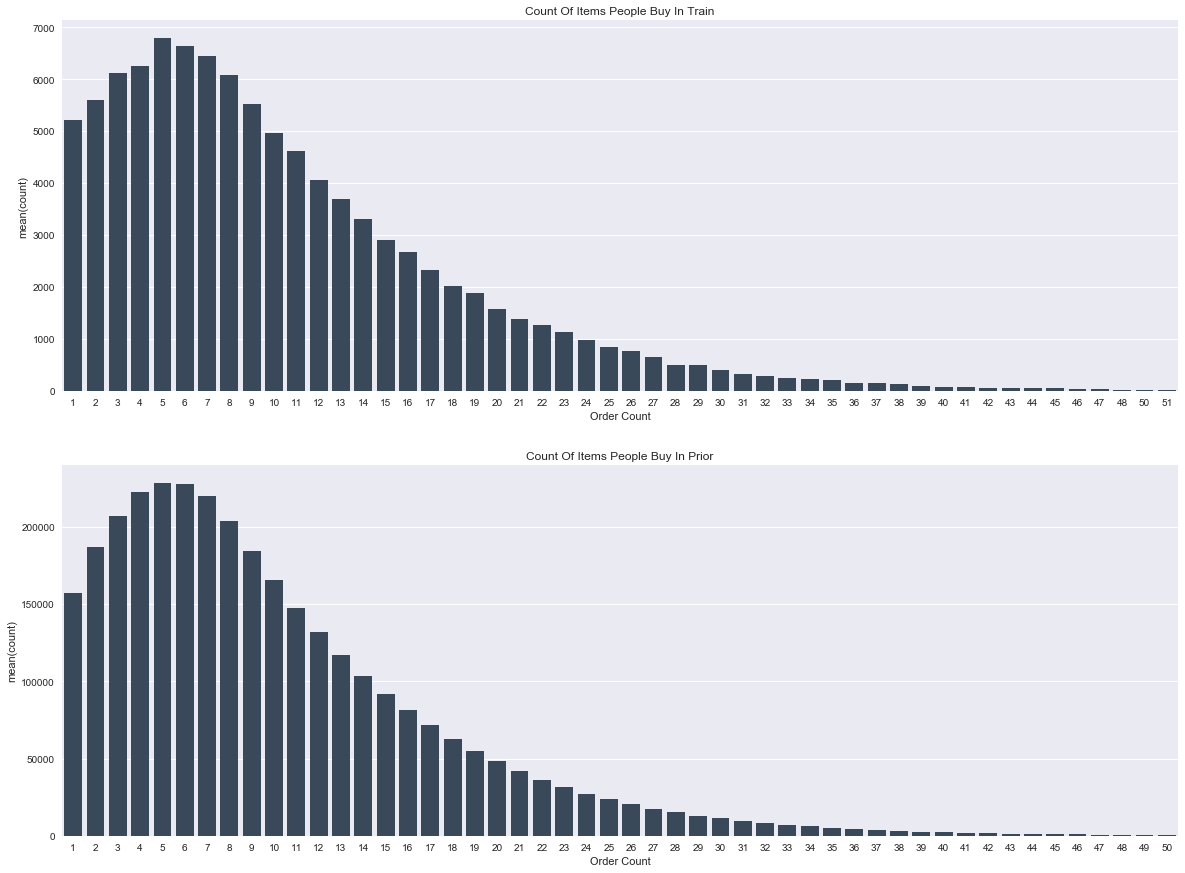

In [47]:
fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,15)
order_products_prior = order_products_prior.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
order_products_prior["count"] = order_products_prior["product_id"]
order_products_prior["no_of_products"] = order_products_prior.index
order_products_train = order_products_train.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
order_products_train["count"] = order_products_train["product_id"]
order_products_train["no_of_products"] = order_products_train.index
sns.barplot(data=order_products_train.head(50),x="no_of_products",y="count",ax=ax1,color="#34495e")
sns.barplot(data=order_products_prior.head(50),x="no_of_products",y="count",ax=ax2,color="#34495e")
ax1.set(xlabel='Order Count',title="Count Of Items People Buy In Train")
ax2.set(xlabel='Order Count',title="Count Of Items People Buy In Prior")

# 3b: Best selling products in prior and train

,product_id,count,product_name,aisle_id,department_id
0,1,6,Chocolate Sandwich Cookies,61,19
1,2,6,All-Seasons Salt,104,13
2,3,5,Robust Golden Unsweetened Oolong Tea,94,7
3,19,2,Gluten Free Quinoa Three Cheese & Mushroom Blend,63,9
4,35,2,Italian Herb Porcini Mushrooms Chicken Sausage,106,12


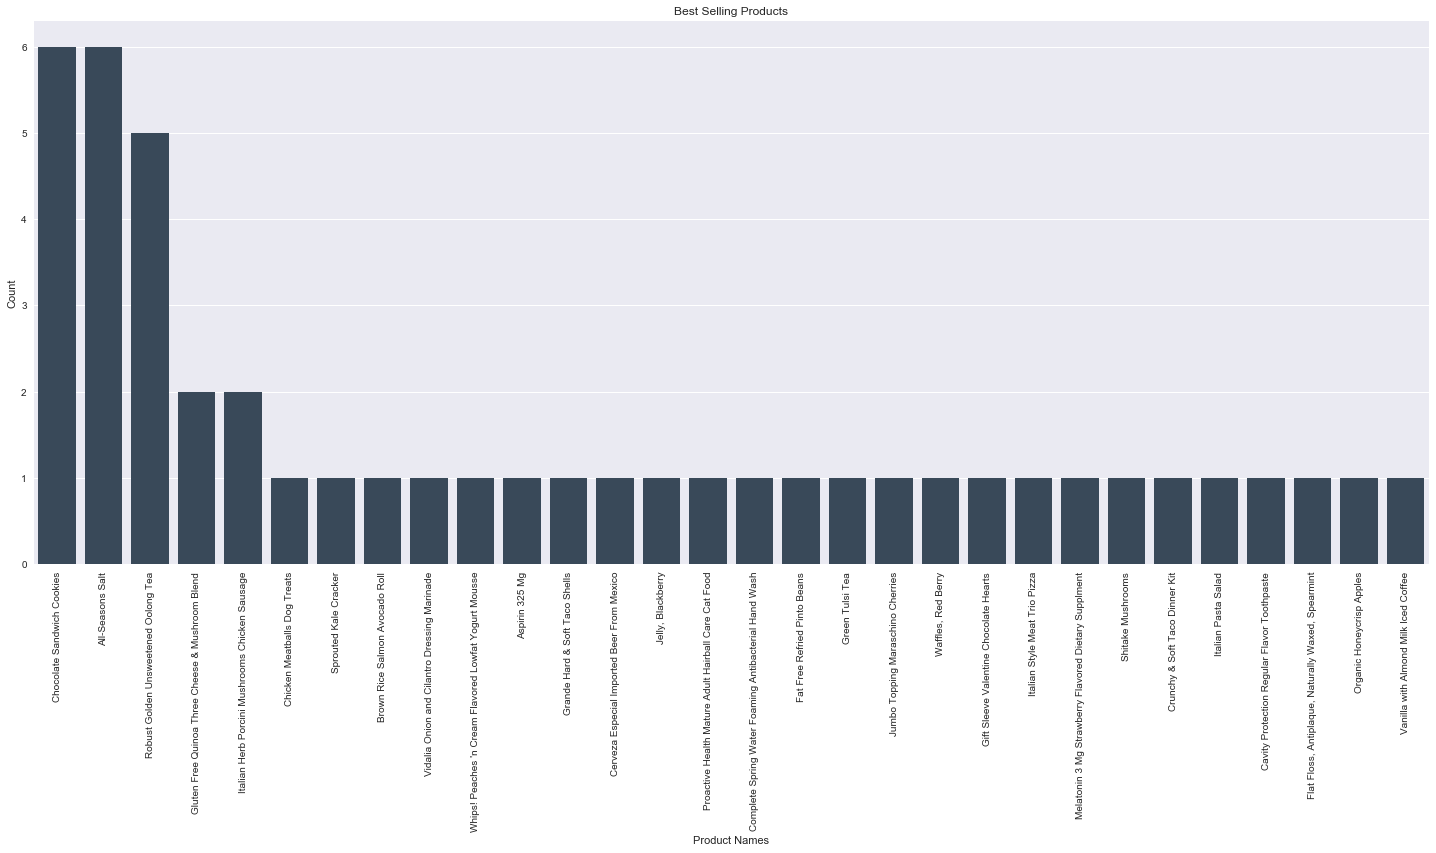

In [49]:
products_count = order_products_train["product_id"].value_counts().to_frame()
products_count["count"] = products_count.product_id
products_count["product_id"] = products_count.index
mergedData = pd.merge(products_count,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color="#34495e")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head()

# 3c: Top reordered products

In [ ]:
products_count_reordered = order_products_train[order_products_train["reordered"]==1]["product_id"].value_counts().to_frame()
products_count_reordered["reordered_count"] = products_count_reordered.product_id
products_count_reordered["product_id"] = products_count_reordered.index

products_count_reordered_m = pd.merge(products_count, 
                                      products_count_reordered, 
                                      how="left", on="product_id").sort_values(by="count",ascending=False)
products_count_reordered_m["reordered_ratio"] = products_count_reordered_m[
    "reordered_count"]/products_count_reordered_m["count"]

products_count_reordered_m.sort_values(by="reordered_ratio",ascending=False,inplace=True)
products_m = pd.merge(products_count_reordered_m,
                      products,
                      how="left", on="product_id")

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=products_m[products_m["count"]>40].head(30),x="product_name",y="reordered_ratio",color="#34495e",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)

productMerged.head(10)

# 3d: First product to reorder count

In [ ]:
product_count_first = order_products_train[order_products_train["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
product_count_first["reordered_count"] = order_products_train.product_id
product_count_first["product_id"] = order_products_train.index

order_products_train_m = pd.merge(products_count,
                                  product_count_first,
                                  how="left", on="product_id").sort_values(by="count",ascending=False)
product_count_first_m["first_ordered_ratio"] = product_count_first_m[
    "reordered_count"]/productCountFirstMerged["count"]
product_count_first_m.sort_values(by="first_ordered_ratio",
                                  ascending=False,inplace=True)

first_m = pd.merge(product_count_first_m,products,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=first_m[first_m["count"]>10].head(30),x="product_name",y="first_ordered_ratio",color="#34495e",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)